In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [2]:
def handledata (value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handledata)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

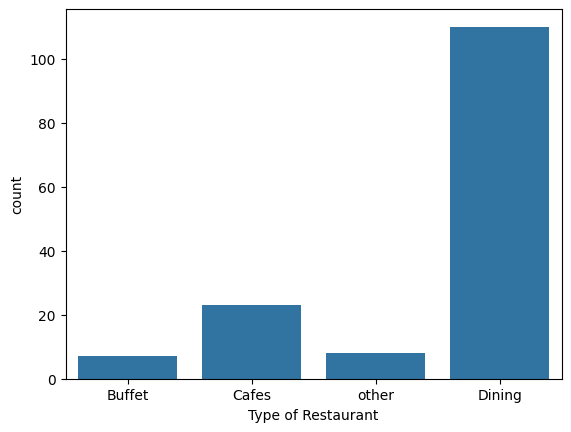

In [4]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

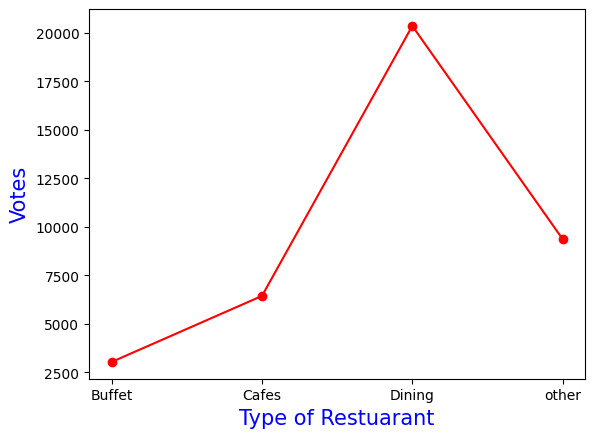

In [5]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
results = pd.DataFrame({'votes': grouped_data})
plt.plot(results, c='red', marker = 'o')
plt.xlabel("Type of Restuarant", c='blue', size=15)
plt.ylabel("Votes", c='blue', size=15)

In [6]:
max_votes = df['votes'].max()
res_with_max_votes = df.loc[df['votes'] == max_votes, "name"]

print("Restuarant with max votes:")
print(res_with_max_votes)

Restuarant with max votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

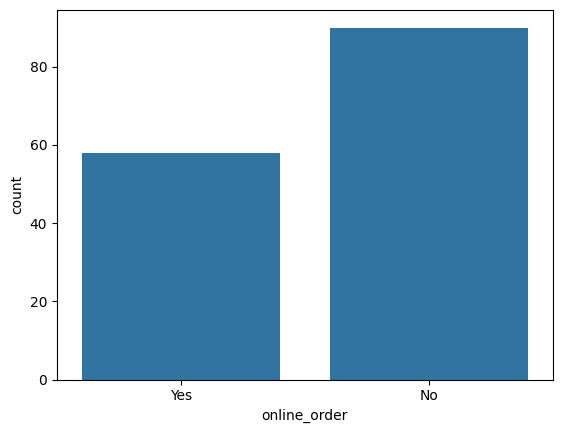

In [7]:
sns.countplot(x=df['online_order'])

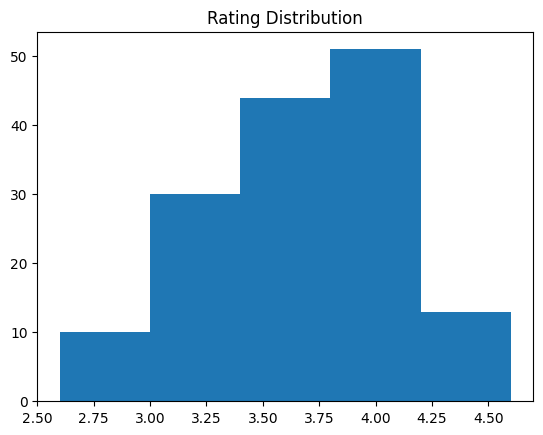

In [8]:
plt.hist(x=df['rate'], bins =5)
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

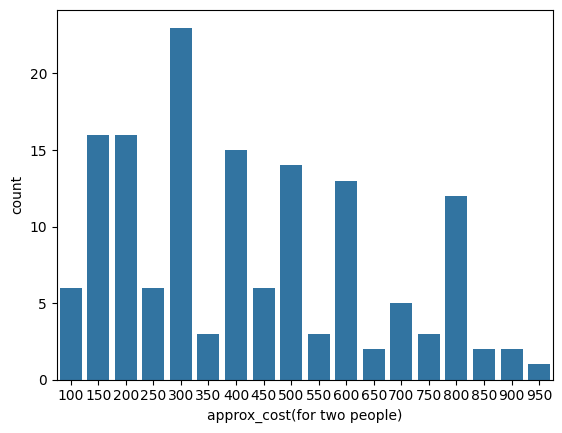

In [9]:
sns.countplot(x=df['approx_cost(for two people)'])

<Axes: xlabel='online_order', ylabel='rate'>

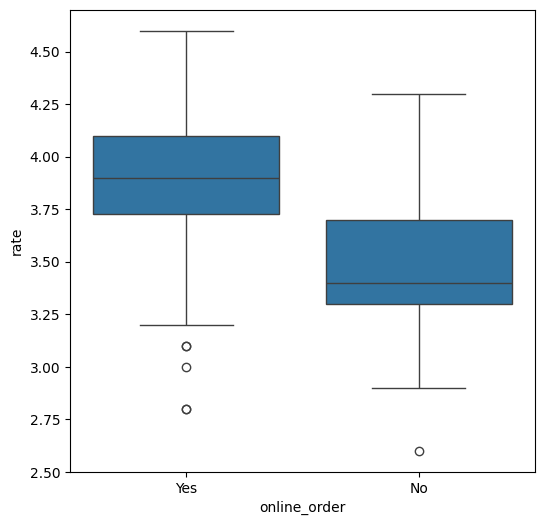

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['online_order'], y=df['rate'])

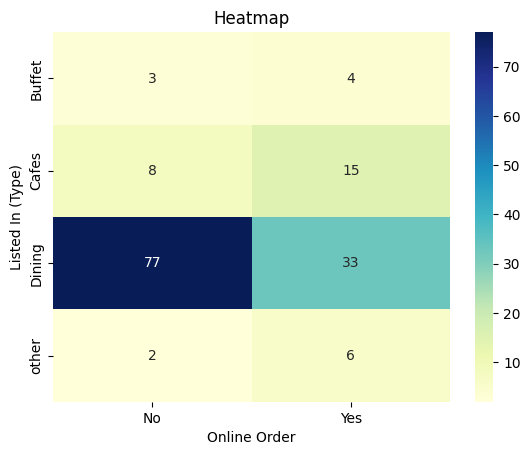

In [16]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()
